In [5]:
import importlib
import sys
import os,sys
sys.path.insert(1, os.path.join(os.getcwd()  , '..'))

In [6]:
%%capture
%run TradingStrategy.py
%run ApiClient.py
%run BaseStrategy.py
%run ExponentialMovingAverageStrategy
%run SimpleMovingAverageStrategy

import importlib
import numpy as np
import pandas as pd
import TradingStrategy as ts
import ApiClient as ac
import ExponentialMovingAverageStrategy as ema
import SimpleMovingAverageStrategy as sma

importlib.reload(ts)
importlib.reload(ac)
importlib.reload(ema)
importlib.reload(sma)


In [7]:
Api_Key =''
Secret_Key=''
endpoint='https://paper-api.alpaca.markets'

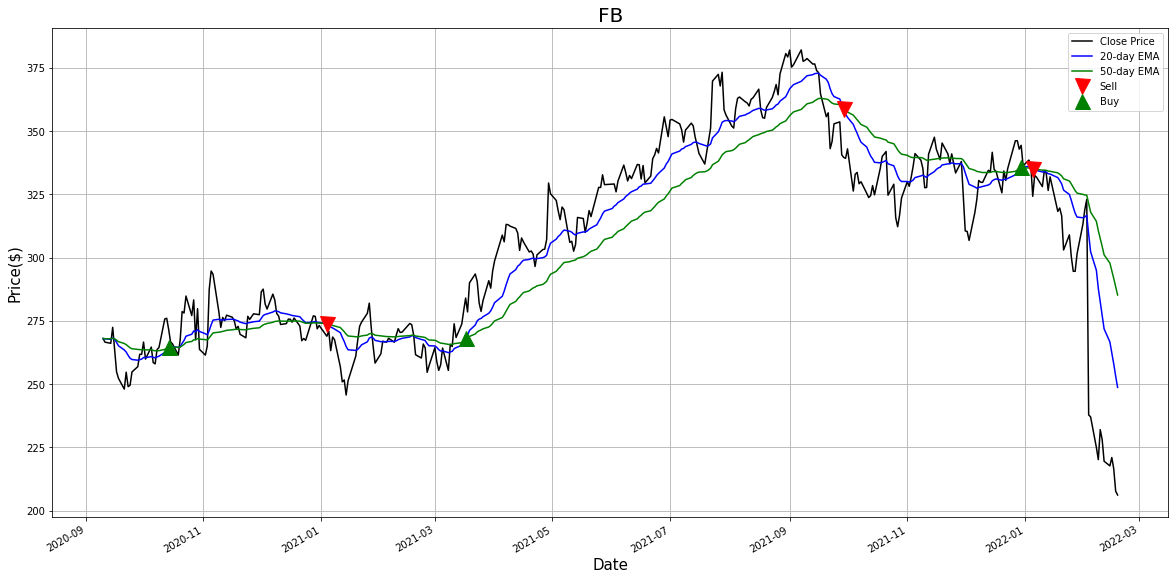

Percentage return of Buy and Hand algorithm for FB for 365 day period:  -26.7%
Percentage return of EMA algorithm for FB for 365 day period:  10.7%


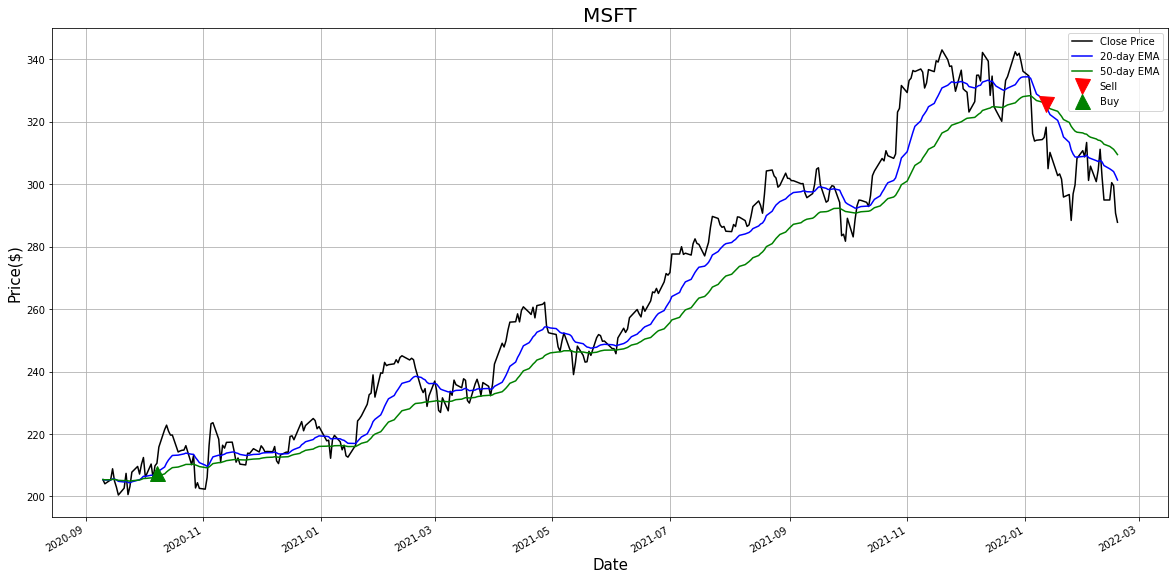

Percentage return of Buy and Hand algorithm for MSFT for 365 day period:  33.4%
Percentage return of EMA algorithm for MSFT for 365 day period:  40.8%


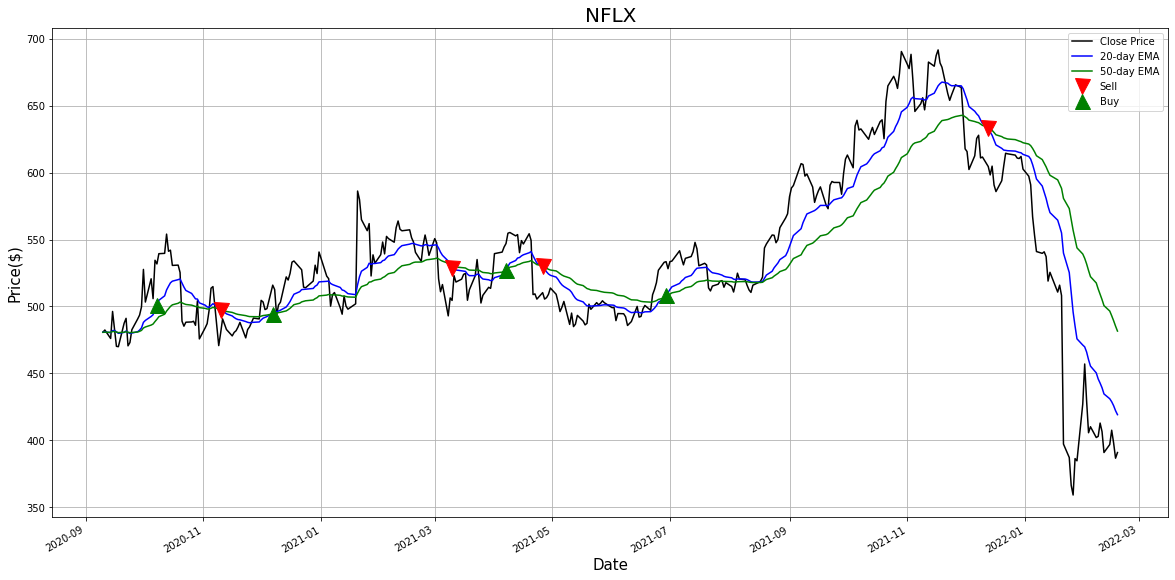

Percentage return of Buy and Hand algorithm for NFLX for 365 day period:  -20.8%
Percentage return of EMA algorithm for NFLX for 365 day period:  -6.9%


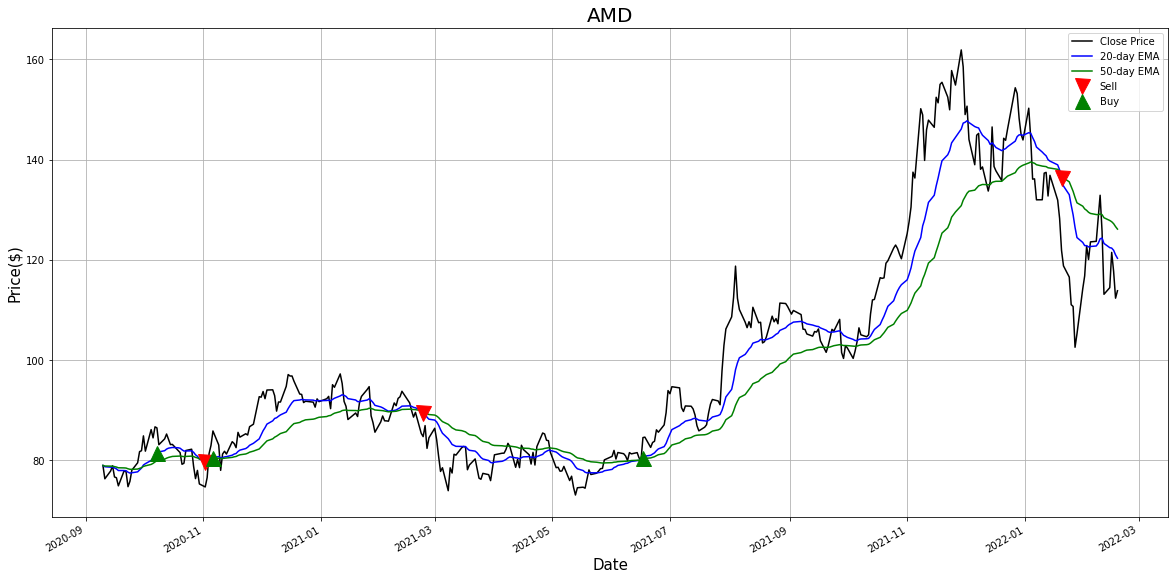

Percentage return of Buy and Hand algorithm for AMD for 365 day period:  36.5%
Percentage return of EMA algorithm for AMD for 365 day period:  20.7%


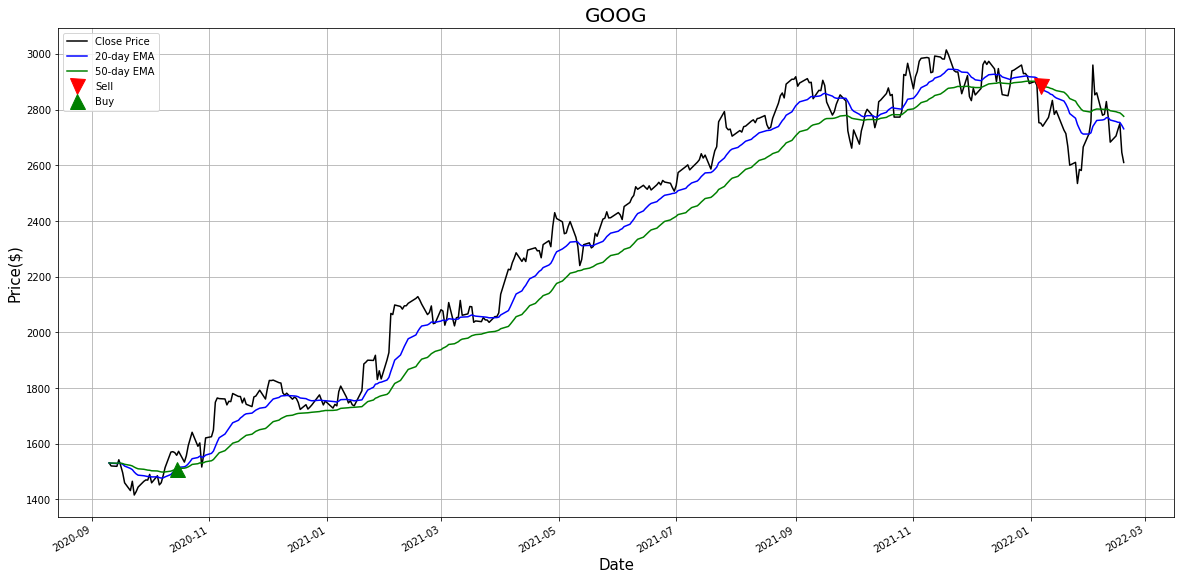

Percentage return of Buy and Hand algorithm for GOOG for 365 day period:  53.2%
Percentage return of EMA algorithm for GOOG for 365 day period:  56.7%


In [8]:


client = ac.ApiClient(api_key_Id=Api_Key,api_key_secret=Secret_Key)


for ticker in ["FB","MSFT","NFLX","AMD","GOOG"]:
  df= client. get_closing_price(ticker,365)

  ema_instance = ema.ExponentialMovingAverageStrategy(df=df,ticker=ticker) # you can replace this with SimpleMovingAverage

  #print(df.head(10))
  df= ema_instance.create_trading_strategy(long_period=50,short_period=20,column='close') 

   #calculate the profits
  df = ema_instance.calculate_profit()

  # The returns of the Buy and Hold strategy:
  hold_strategy_profit = df["daily_profit"].sum() * 100

  # The returns of the algorithm
  ema_strategy_profit = df["strategy_profit"].sum() * 100
  

  print(f'Percentage return of Buy and Hand algorithm for {ticker} for 365 day period:  {hold_strategy_profit.round(3)}%') 
  print(f'Percentage return of {ema_instance.mvType} algorithm for {ticker} for 365 day period:  {ema_strategy_profit.round(3)}%') 
  
  #df.to_csv("data-processed-1.csv")
  
         
 

